##Set TensorFlow version

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Download data and unzip

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/ai_data_colab2/cat_dog.zip \
    -O cat_dog.zip

--2020-05-06 02:18:39--  https://storage.googleapis.com/ai_data_colab/cat_dog.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227743931 (217M) [application/zip]
Saving to: ‘cat_dog.zip’

cat_dog.zip         100%[===================>] 217.19M  44.8MB/s    in 4.8s    

2020-05-06 02:18:44 (44.8 MB/s) - ‘cat_dog.zip’ saved [227743931/227743931]



In [0]:
import os
import zipfile

local_zip = 'cat_dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [0]:
train_cat_dir = os.path.join('cat_dog/train/cat')
train_dog_dir = os.path.join('cat_dog/train/dog')
test_cat_dir = os.path.join('cat_dog/test/cat')
test_dog_dir = os.path.join('cat_dog/test/dog')

print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total testing cat images:', len(os.listdir(test_cat_dir)))
print('total testing dog images:', len(os.listdir(test_dog_dir)))

test_cat_files = os.listdir(test_cat_dir)
print(test_cat_files[:5])
test_dog_files = os.listdir(test_dog_dir)
print(test_dog_files[:5])

total training cat images: 4000
total training dog images: 4000
total testing cat images: 1000
total testing dog images: 1000
['cat.4436.jpg', 'cat.4345.jpg', 'cat.4913.jpg', 'cat.4271.jpg', 'cat.4825.jpg']
['dog.4434.jpg', 'dog.4496.jpg', 'dog.4945.jpg', 'dog.4548.jpg', 'dog.4076.jpg']


##Import libraries

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Build the model with pretrained model

In [0]:
vgg16 = VGG16(include_top=False, # remove the top dense layers (classifier)
              weights='imagenet', # use the pre-trained weight 
              input_shape=(150,150,3))

model = Sequential()
model.add(vgg16)    # use vgg16 as the first layer
model.add(Flatten())
model.add(Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))

vgg16.trainable = False     # freeze the weights of vgg16
model.summary()

model.compile(optimizer=RMSprop(lr=2e-5),   # lower the learning rate
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
______________________

##Data augmentation

In [0]:
gobj = ImageDataGenerator(rescale=1./255, validation_split=0.75, #use fewer training data in this transfer learning case on purpose
    rotation_range=40,     
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=10,         
    zoom_range=0.2,        
    horizontal_flip=True)  

trn_gen = gobj.flow_from_directory( 
    'cat_dog/train',         
    target_size=(150, 150),  
    batch_size=50,        
    class_mode='binary',    
    subset='training')      

Found 2000 images belonging to 2 classes.


In [0]:
gobj = ImageDataGenerator(rescale=1./255)  

val_gen = gobj.flow_from_directory( 
    'cat_dog/test',          
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


##Train the model

In [0]:
history = model.fit(trn_gen,        
                    epochs=30, verbose=1,
                    validation_data=val_gen)

Epoch 1/30
Epoch 1/30
40/40 - 9s - loss: 0.5247 - acc: 0.7760
40/40 - 29s - loss: 0.7003 - acc: 0.5775 - val_loss: 0.5247 - val_acc: 0.7760
Epoch 2/30
Epoch 1/30
40/40 - 9s - loss: 0.4408 - acc: 0.8345
40/40 - 22s - loss: 0.5907 - acc: 0.6850 - val_loss: 0.4408 - val_acc: 0.8345
Epoch 3/30
Epoch 1/30
40/40 - 9s - loss: 0.3992 - acc: 0.8415
40/40 - 22s - loss: 0.5337 - acc: 0.7210 - val_loss: 0.3992 - val_acc: 0.8415
Epoch 4/30
Epoch 1/30
40/40 - 9s - loss: 0.3742 - acc: 0.8430
40/40 - 22s - loss: 0.4858 - acc: 0.7570 - val_loss: 0.3742 - val_acc: 0.8430
Epoch 5/30
Epoch 1/30
40/40 - 9s - loss: 0.3600 - acc: 0.8480
40/40 - 22s - loss: 0.4665 - acc: 0.7850 - val_loss: 0.3600 - val_acc: 0.8480
Epoch 6/30
Epoch 1/30
40/40 - 9s - loss: 0.3428 - acc: 0.8560
40/40 - 22s - loss: 0.4596 - acc: 0.7835 - val_loss: 0.3428 - val_acc: 0.8560
Epoch 7/30
Epoch 1/30
40/40 - 9s - loss: 0.3330 - acc: 0.8595
40/40 - 22s - loss: 0.4317 - acc: 0.7945 - val_loss: 0.3330 - val_acc: 0.8595
Epoch 8/30
Epoch 1/3

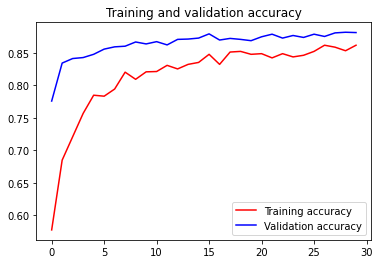

<Figure size 432x288 with 0 Axes>

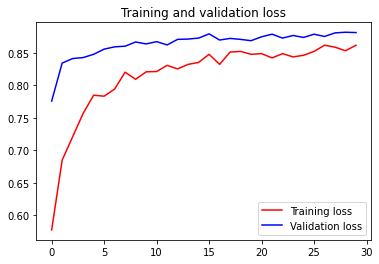

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, acc, 'r', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Reference: https://www.tensorflow.org/tutorials/images/transfer_learning